# Predicting Loan Decisions with various Models

## Table of Contents
1. [Importing Libraries and Dataset](#import)
2. [Splitting and Standardizing Data](#split)
3. [Principal Component Analysis](#pca) 
4. [Building Models](#models)
  - [Logistic Regression](#lr)
  - [KNN](#knn)
  - [Random Forest](#rf)
  - [Support Vector Machine](#svm)
  - [Decision Tree](#dt)
  
5. [Comparing Models](#eval)


## 1. Importing Libraries and Dataset
<a id='import'></a>

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc
from sklearn.tree import export_graphviz
from matplotlib.colors import ListedColormap
from IPython.display import Image
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD


 -  Read the dataset

In [3]:
dataset = pd.read_csv('lendingdata_preprocessed',index_col=[0])
dataset

currency_policy  lender_count  loan_amount  status  term_in_months  \
0                    1           5.0        125.0       1             8.0   
1                    1           5.0        125.0       1            14.0   
2                    1          10.0        375.0       1             8.0   
3                    0          27.0        850.0       1            14.0   
4                    0          17.0        550.0       1             9.0   
...                ...           ...          ...     ...             ...   
27531                1          85.0       2300.0       1             9.0   
27532                0          17.0        475.0       1             8.0   
27533                1          38.0       1075.0       1            11.0   
27534                1          35.0       1075.0       1             6.0   
27535                0          55.0       2000.0       1            14.0   

        rMPI  activity#Animal Sales  activity#Aquaculture  activity#Arts  \
0      0.097                      0                     0              0   
1      0.055                      0                     0              0   
2      0.000                      0                     0              0   
3      0.021                      0                     0              0   
4      0.417                      0                     0              0   
...      ...                    ...                   ...            ...   
27531  0.158                      0                     0              0   
27532  0.422                      0                     0              0   
27533  0.055                      0                     0              0   
27534  0.122                      0                     0              0   
27535  0.033                      0                     0              0   

       activity#Auto Repair  ...  sector#Manufacturing  sector#Personal Use  \
0                         0  ...                     0                    1   
1                         0  ...                     0                    0   
2                         0  ...                     0                    0   
3                         0  ...                     0                    0   
4                         0  ...                     0                    0   
...                     ...  ...                   ...                  ...   
27531                     0  ...                     0                    0   
27532                     0  ...                     0                    0   
27533                     0  ...                     0                    0   
27534                     0  ...                     0                    0   
27535                     0  ...                     0                    0   

       sector#Retail  sector#Services  sector#Transportation  \
0                  0                0                      0   
1                  0                0                      0   
2                  0                0                      0   
3                  0                0                      0   
4                  0                0                      0   
...              ...              ...                    ...   
27531              0                1                      0   
27532              0                0                      0   
27533              1                0                      0   
27534              0                0                      0   
27535              0                0                      0   

       sector#Wholesale  repayment_interval#irregular  \
0                     0                             0   
1                     0                             1   
2                     0                             0   
3                     0                             0   
4                     0                             1   
...                 ...                           ...   
27531                 0                             

## 2. Splitting and Standardizing the Data
<a id='split'></a>

In [4]:
y = dataset.status.values
X = dataset.drop(['status'],axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 3. Principal Component Analysis
<a id='pca'></a>

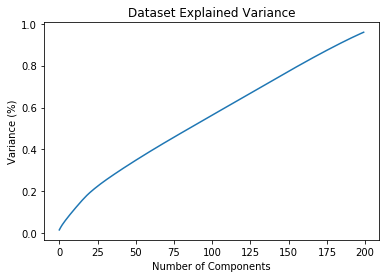

In [7]:
pca = PCA(n_components = 200)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

 - Save Optimal Data

## 4. Building Models
<a id='models'></a>

### 4.1 Logistic Regression 
<a id='lr'></a>

#### 4.1.1 Recursive Feature Elimination

Optimal number of features : 157


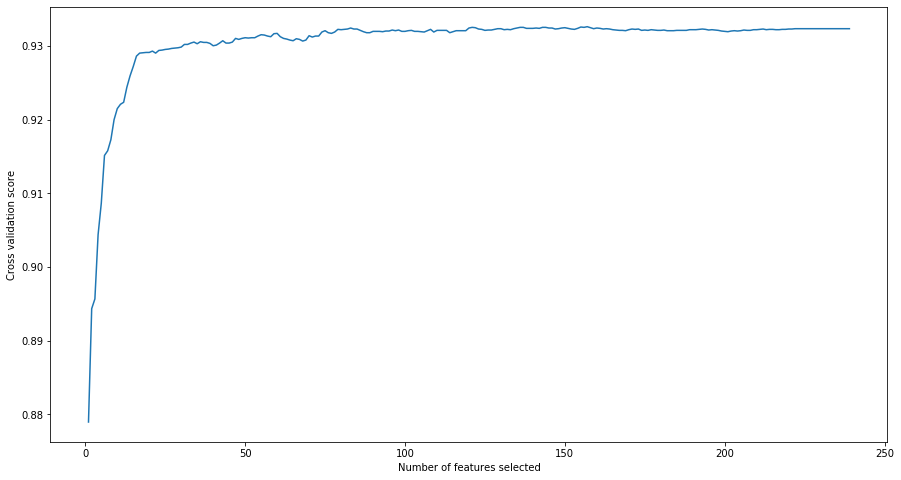

Index(['currency_policy', 'lender_count', 'loan_amount', 'term_in_months',
       'activity#Arts', 'activity#Balut-Making', 'activity#Beauty Salon',
       'activity#Beekeeping', 'activity#Beverages', 'activity#Bicycle Repair',
       ...
       'sector#Health', 'sector#Housing', 'sector#Manufacturing',
       'sector#Retail', 'sector#Services', 'sector#Transportation',
       'repayment_interval#irregular', 'repayment_interval#monthly',
       'borrower_genders#group', 'borrower_genders#male'],
      dtype='object', length=157)


In [8]:
lr= LogisticRegression(random_state=0,max_iter=4000)
selector = RFECV(estimator = lr ,step =1 , cv=StratifiedKFold(10),scoring='accuracy')
selector.fit(X_train,y_train)
print("Optimal number of features : %d" % selector.n_features_)
plt.figure(figsize=(15,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()
#classifier.fit(X_train, y_train)
selected = X.columns[(selector.get_support())]
print(selected)
X_train_opt = selector.transform(X_train)
X_test_opt = selector.transform(X_test)

<br><br>
#### 4.1.2 Grid Search

In [9]:
lr = LogisticRegression(random_state=0)
parameters = [{'penalty':['l2'], 'solver': ['newton-cg','saga'],'C': [0.001,0.01,1,5,10,20],
               'class_weight':['balanced','dict']},
            {'penalty':['l1'],'solver':['liblinear','saga'],'C': [0.001,0.01,1,5,5,10,20]}]
grid_search = GridSearchCV(estimator = lr,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train_opt, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy "+str(best_accuracy))
print("Best Parameters "+str(best_parameters))

Best Accuracy 0.9337659858594278
Best Parameters {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


#### 4.1.3 Fitting The Model

In [10]:
lr = LogisticRegression(penalty='l2',C=25,random_state=0,class_weight='dict',solver='newton-cg')
#lr = LogisticRegression(penalty='l1',C=1,random_state=0,solver='liblinear')
lr.fit(X_train_opt,y_train)
y_pred = lr.predict(X_test_opt)
train = round((lr.score(X_train_opt,y_train))*100,1)
test = round((lr.score(X_test_opt,y_test))*100,1)
print("training accuracy " + str(train))
print("testing accuracy " + str(test))

training accuracy 93.5
testing accuracy 92.8


 - Saving Selected Features as a Dataset

In [77]:
ff = pd.DataFrame(data = X_train_opt[0:,0:],
                 index = [i for i in range(X_train_opt.shape[0])],
                 columns  = selected)
f = pd.DataFrame(data = X_test_opt[0:,0:],
                index = [i for i in range(X_test_opt.shape[0])],
                columns = selected)
gg = pd.DataFrame(data = y_train,
                 index = [i for i in range(y_train.shape[0])],
                 columns = ['status'])
g = pd.DataFrame(data = y_test,
                 index = [i for i in range(y_test.shape[0])],
                 columns = ['status'])

In [78]:
df1 = pd.concat([ff,f],axis=0)
df2 = pd.concat([gg,g],axis=0)
df = pd.concat([df1,df2],axis =1 )

In [80]:
df.to_csv('loan_data_opt.csv')

#### 4.1.4 Cross Validation

In [28]:
accuracies = cross_val_score(estimator = lr, X = X_train_opt, y = y_train, cv = 10)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)
print("Cross Validation Score " + str(accuracies.mean()*100))

[[ 368  320]
 [  78 4742]]
              precision    recall  f1-score   support

           0       0.83      0.53      0.65       688
           1       0.94      0.98      0.96      4820

    accuracy                           0.93      5508
   macro avg       0.88      0.76      0.80      5508
weighted avg       0.92      0.93      0.92      5508

Cross Validation Score 93.3765862173743


 - Visualizing Decision Boundary

(5508, 2)


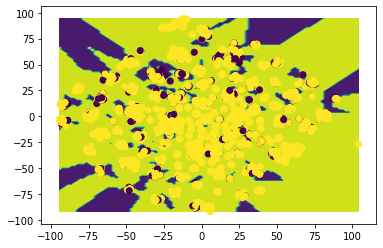

In [36]:
X_Train_embedded = TSNE(n_components=2).fit_transform(X_test_opt)
print (X_Train_embedded.shape)

# create meshgrid
resolution = 100 # 100x100 background pixels
X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:,0]), np.max(X_Train_embedded[:,0])
X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:,1]), np.max(X_Train_embedded[:,1])
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

# approximate Voronoi tesselation on resolution x resolution grid using 1-NN
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_Train_embedded, y_pred) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
plt.contourf(xx, yy, voronoiBackground)
plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=y_test)
plt.show()

 - Saving Model

In [44]:
import joblib
filename = 'logistc_model.sav'
joblib.dump(lr, filename)

['logistc_model.sav']

 - Loading the saved model

In [46]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test_opt, y_test)
print(result)

0.9277414669571532


### 4.2 K Nearest Neighbors Classifier
<a id='knn'></a>

#### 4.2.1 Fitting The Model

 - Without PCA (Slower Training)

In [39]:
knn = KNeighborsClassifier(metric='minkowski',n_neighbors=20,p=2,weights='uniform')
knn.fit(X_train, y_train)
train = round((knn.score(X_train,y_train))*100,1)
test = round((knn.score(X_test,y_test))*100,1)
y_pred = knn.predict(X_test)
print("training accuracy " + str(train))
print("testing accuracy " + str(test))

training accuracy 89.9
testing accuracy 88.6


 - With PCA (Faster Training)

In [40]:
knn = KNeighborsClassifier(metric='minkowski',n_neighbors=20,p=2,weights='uniform')
knn.fit(X_train_pca, y_train)
train = round((knn.score(X_train_pca,y_train))*100,1)
test = round((knn.score(X_test_pca,y_test))*100,1)
y_pred = knn.predict(X_test_pca)
print("training accuracy " + str(train))
print("testing accuracy " + str(test))

training accuracy 88.9
testing accuracy 87.7


#### 4.2.2 Cross Validation

 - Without PCA

In [48]:
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)
print("Cross Validation Score " + str(accuracies.mean()*100))

[[ 125  563]
 [ 114 4706]]
              precision    recall  f1-score   support

           0       0.52      0.18      0.27       688
           1       0.89      0.98      0.93      4820

    accuracy                           0.88      5508
   macro avg       0.71      0.58      0.60      5508
weighted avg       0.85      0.88      0.85      5508

Cross Validation Score 89.02307067853556


 - With PCA

In [49]:
accuracies = cross_val_score(estimator = knn, X = X_train_pca, y = y_train, cv = 10)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)
print("Cross Validation Score " + str(accuracies.mean()*100))

[[ 125  563]
 [ 114 4706]]
              precision    recall  f1-score   support

           0       0.52      0.18      0.27       688
           1       0.89      0.98      0.93      4820

    accuracy                           0.88      5508
   macro avg       0.71      0.58      0.60      5508
weighted avg       0.85      0.88      0.85      5508

Cross Validation Score 88.20592264779718


 - Save the model

In [61]:
import joblib
filename = 'KNN_model.sav'
joblib.dump(knn, filename)

['KNN_model.sav']

 - Load The Model

In [62]:
load_model = joblib.load(filename)
result = load_model.score(X_test_pca, y_test)
print(result)

0.8770878721859114


### 4.3 Random Forest Classifier
<a id='rf'></a>

#### 4.3.1 Random Forest Feature Selector

In [7]:
column_labels = X.columns.values

In [9]:
rfc = RandomForestClassifier(random_state=0,n_estimators=1000)
rfc.fit(X_train,y_train)
importances = rfc.feature_importances_
f_importances = pd.Series(importances, X.columns)
f_importances.sort_values(ascending=False, inplace=True)
f_importances
sfm = SelectFromModel(rfc, threshold=0.035)
sfm.fit(X_train, y_train)
print("Important Features")
a = []
for feature_list_index in sfm.get_support(indices=True):
    print("Feature "+ str(feature_list_index) + " : " + column_labels[feature_list_index])
    a.append(column_labels[feature_list_index])
X_train_imp = sfm.transform(X_train)
X_test_imp = sfm.transform(X_test)

Important Features
Feature 1 : lender_count
Feature 2 : loan_amount
Feature 3 : term_in_months
Feature 4 : rMPI


 - Saving Important Features Dataset

In [82]:
ff = pd.DataFrame(data = X_train_imp[0:,0:],
                 index = [i for i in range(X_train_opt.shape[0])],
                 columns  = a)
f = pd.DataFrame(data = X_test_imp[0:,0:],
                index = [i for i in range(X_test_opt.shape[0])],
                columns = a)
gg = pd.DataFrame(data = y_train,
                 index = [i for i in range(y_train.shape[0])],
                 columns = ['status'])
g = pd.DataFrame(data = y_test,
                 index = [i for i in range(y_test.shape[0])],
                 columns = ['status'])

In [83]:
df1 = pd.concat([ff,f],axis=0)
df2 = pd.concat([gg,g],axis=0)
df = pd.concat([df1,df2],axis =1 )

In [84]:
df.to_csv('loan_data_imp.csv')

#### 4.3.2 Fitting The Model

 - Without Feature Selection

In [10]:
rfc = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=-1)
#classifier = RandomForestClassifier(random_state=0,n_estimators=1000,criterion="gini")
rfc.fit(X_train, y_train)
train = round((rfc.score(X_train,y_train))*100,1)
test = round((rfc.score(X_test,y_test))*100,1)
y_pred = rfc.predict(X_test)
print("training accuracy " + str(train))
print("testing accuracy" + str(test))

training accuracy 100.0
testing accuracy93.6


 - With Feature Selection

In [11]:
rfc = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=-1)
#classifier = RandomForestClassifier(random_state=0,n_estimators=1000,criterion="gini")
rfc.fit(X_train_imp, y_train)
train = round((rfc.score(X_train_imp,y_train))*100,1)
test = round((rfc.score(X_test_imp,y_test))*100,1)
y_pred = rfc.predict(X_test_imp)
print("training accuracy " + str(train))
print("testing accuracy " + str(test))

training accuracy 99.6
testing accuracy 93.9


#### 4.3.3 Cross Validation

 - Without Feature Selection

In [89]:
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)
print("Cross Validation Score " + str(accuracies.mean()*100))

[[ 483  205]
 [ 130 4690]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       688
           1       0.96      0.97      0.97      4820

    accuracy                           0.94      5508
   macro avg       0.87      0.84      0.85      5508
weighted avg       0.94      0.94      0.94      5508

Cross Validation Score 93.80331419915787


 - With Feature Selection

In [66]:
accuracies = cross_val_score(estimator = rfc, X = X_train_imp, y = y_train, cv = 10)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)
print("Cross Validation Score " + str(accuracies.mean()*100))

[[ 483  205]
 [ 130 4690]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       688
           1       0.96      0.97      0.97      4820

    accuracy                           0.94      5508
   macro avg       0.87      0.84      0.85      5508
weighted avg       0.94      0.94      0.94      5508

Cross Validation Score 93.88050643516004


#### 4.3.4 Visualizing Random Forest

 - Visualizing Random Forest and one Decision Tree

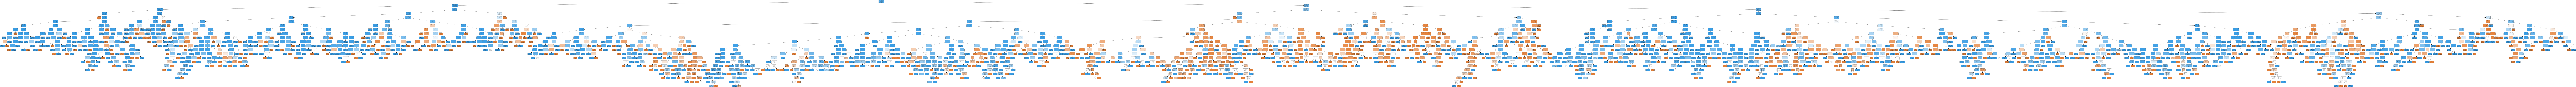

In [67]:
estimator = rfc.estimators_[20]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = a,
                class_names = ['funded','not_funded'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

os.system('dot -Tpng tree.dot -o tree.png')
Image(filename = 'tree.png')

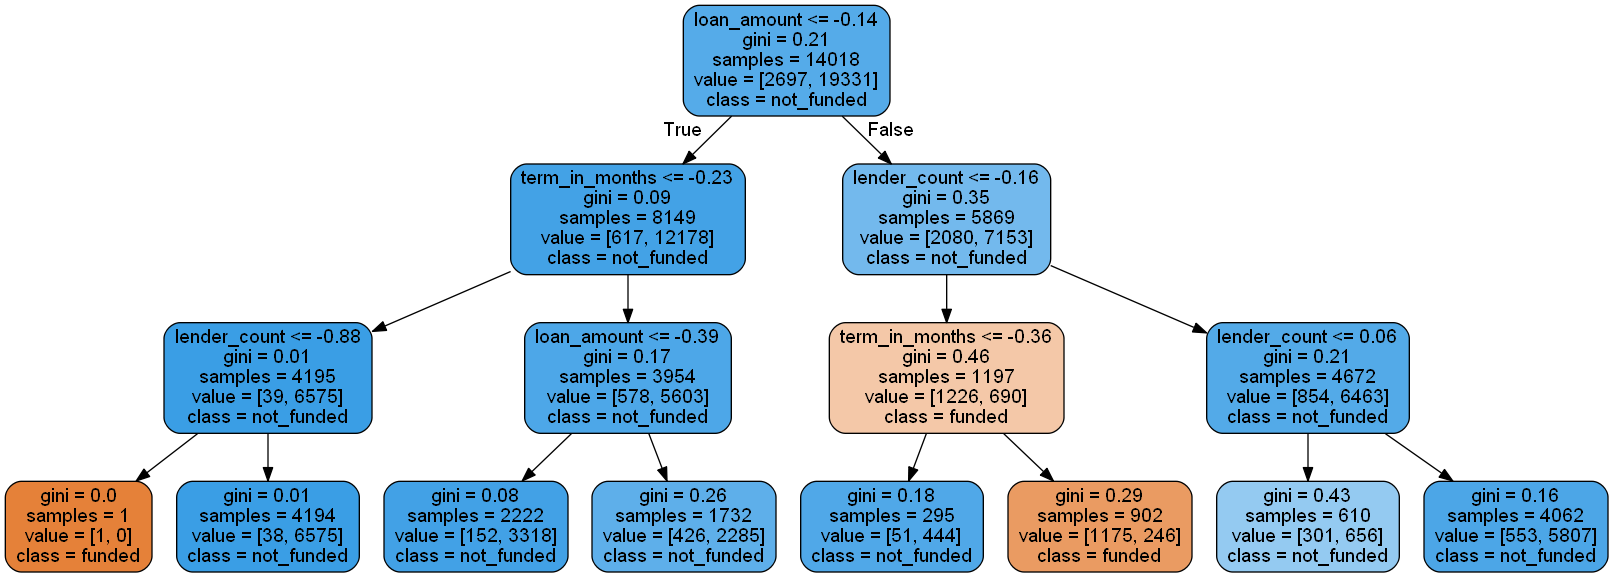

In [68]:
model  = RandomForestClassifier(max_depth=3,n_estimators=1000,random_state=0,n_jobs=-1)
model.fit(X_train_imp,y_train)
estimator_limited = model.estimators_[5]
estimator_limited
export_graphviz(estimator_limited, out_file='tree_limited.dot', 
                feature_names = a,
                class_names = ['funded','not_funded'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

os.system('dot -Tpng tree_limited.dot -o tree_limited.png')
Image(filename = 'tree_limited.png')

 - Saving the model

In [86]:
filename = 'RFC_model.sav'
joblib.dump(rfc, filename)

['RFC_model.sav']

 - Loading the model

In [88]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test_imp, y_test)
print(result)

0.9391793754538853


### 4.4 Kernel SVM
<a id='svm'></a>

#### 4.4.1 Fitting The Model

 - With PCA

In [93]:
svm = SVC(kernel='rbf',random_state=0,probability=True,gamma='auto').fit(X_train_pca,y_train)
y_pred = svm.predict(X_test_pca)
train = round((svm.score(X_train_pca,y_train))*100,1)
test = round((svm.score(X_test_pca,y_test))*100,1)
print("training accuracy " + str(train))
print("testing accuracy" + str(test))

training accuracy 88.6
testing accuracy87.5


 - Saving the model

In [97]:
filename = 'SVM_model.sav'
joblib.dump(svm, filename)

['SVM_model.sav']

 - Loading the model

In [98]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test_pca, y_test)
print(result)

0.8747276688453159


### 4.5 Decision Tree Classifier
<a id='dt'></a>

#### 4.5.1 Grid Search

In [102]:
dc = DecisionTreeClassifier(random_state=0)
parameters = [{'criterion':['gini','entropy'], 'splitter': ['best','random'],'max_depth': [4,6,8,12]}]
grid_search = GridSearchCV(estimator = dc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train_opt, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy "+str(best_accuracy))
print("Best Parameters "+str(best_parameters))

Best Accuracy 0.9393954573546189
Best Parameters {'criterion': 'entropy', 'max_depth': 8, 'splitter': 'best'}


#### 4.5.2 Fitting the model 

 - Without Feature Selection

In [104]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=8)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
train = round((dt.score(X_train,y_train))*100,1)
test = round((dt.score(X_test,y_test))*100,1)
print("training accuracy " + str(train))
print("testing accuracy" + str(test))

training accuracy 95.0
testing accuracy93.6


 - With Feature Selection

In [14]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=8)
dtc.fit(X_train_imp, y_train)
y_pred = dtc.predict(X_test_imp)
train = round((dtc.score(X_train_imp,y_train))*100,1)
test = round((dtc.score(X_test_imp,y_test))*100,1)
print("training accuracy " + str(train))
print("testing accuracy" + str(test))

training accuracy 94.6
testing accuracy93.3


#### 4.5.2 Cross Validation

 - Without Feature Selection

In [106]:
accuracies = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 10)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)
print("Cross Validation Score " + str(accuracies.mean()*100))

[[ 467  221]
 [ 150 4670]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       688
           1       0.95      0.97      0.96      4820

    accuracy                           0.93      5508
   macro avg       0.86      0.82      0.84      5508
weighted avg       0.93      0.93      0.93      5508

Cross Validation Score 93.88052292658472


 - With Feature Selection

In [107]:
accuracies = cross_val_score(estimator = dtc, X = X_train_imp, y = y_train, cv = 10)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)
print("Cross Validation Score " + str(accuracies.mean()*100))

[[ 467  221]
 [ 150 4670]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       688
           1       0.95      0.97      0.96      4820

    accuracy                           0.93      5508
   macro avg       0.86      0.82      0.84      5508
weighted avg       0.93      0.93      0.93      5508

Cross Validation Score 93.62172712216807


 - Saving the model

In [17]:
import joblib
filename = 'DT_model.sav'
joblib.dump(dtc, filename)

['DT_model.sav']

 - Loading the model

In [21]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test_imp, y_test)
print(result)

0.9326434277414669


## 5. Comparing Models
<a id='eval'></a>

### 5.1 Receiver Operating Characteristics

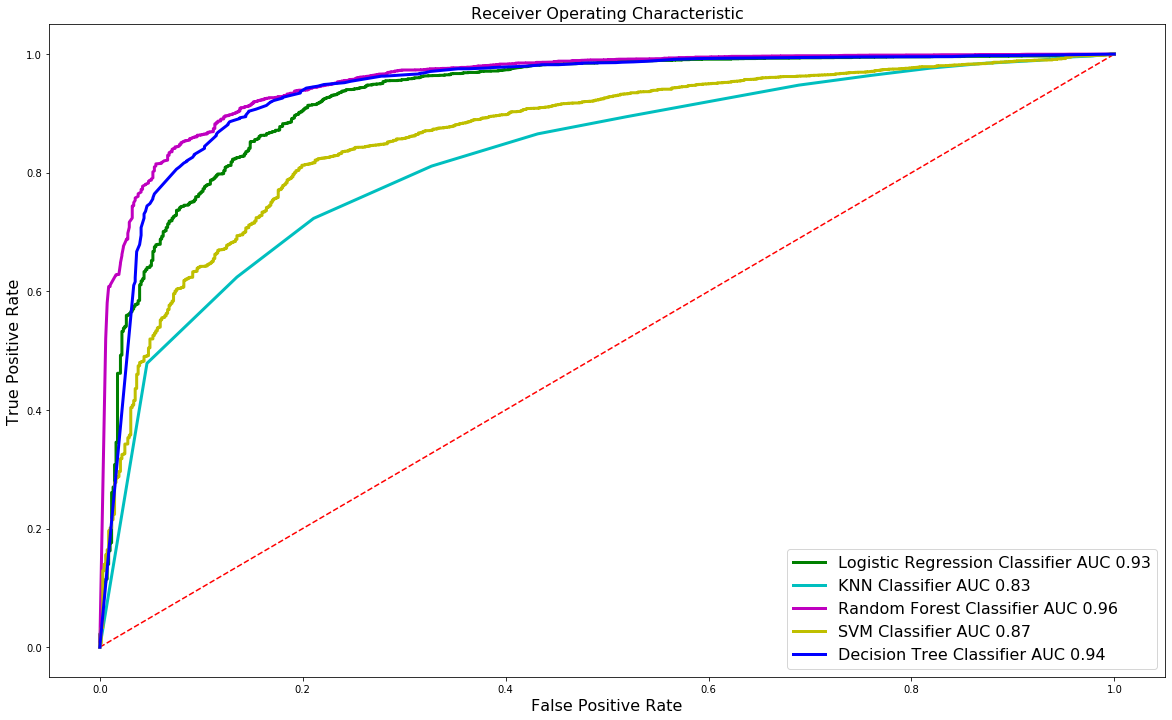

In [183]:
plt.figure(figsize=(20,12))
plt.plot([0,1],[0,1],'r--')

# LR
probs = lr.predict_proba(X_test_opt)
probs = probs[:,1]
fpr, tpr , thresholds = roc_curve(y_test,probs)
roc_auc = auc(fpr,tpr)
label_ = 'Logistic Regression Classifier AUC '+'{0:.2f}'.format(roc_auc)
plt.plot(fpr,tpr,c='g',label=label_, linewidth =3)

# KNN
probs = knn.predict_proba(X_test_pca)
probs = probs[:,1]
fpr, tpr , thresholds = roc_curve(y_test,probs)
roc_auc = auc(fpr,tpr)
label = 'KNN Classifier AUC '+'{0:.2f}'.format(roc_auc)
plt.plot(fpr,tpr,c='c',label=label, linewidth =3)

# RFC
probs = rfc.predict_proba(X_test_imp)
probs = probs[:,1]
fpr, tpr , thresholds = roc_curve(y_test,probs)
roc_auc = auc(fpr,tpr)
label = 'Random Forest Classifier AUC '+'{0:.2f}'.format(roc_auc)
plt.plot(fpr,tpr,c='m',label=label, linewidth =3)

# SVM
probs = svm.predict_proba(X_test_pca)
probs = probs[:,1]
fpr, tpr , thresholds = roc_curve(y_test,probs)
roc_auc = auc(fpr,tpr)
label = 'SVM Classifier AUC '+'{0:.2f}'.format(roc_auc)
plt.plot(fpr,tpr,c='y',label=label, linewidth =3)

# DTC
probs = dtc.predict_proba(X_test_imp)
probs = probs[:,1]
fpr, tpr , thresholds = roc_curve(y_test,probs)
roc_auc = auc(fpr,tpr)
label = 'Decision Tree Classifier AUC '+'{0:.2f}'.format(roc_auc)
plt.plot(fpr,tpr,c='b',label=label, linewidth =3)

plt.xlabel('False Positive Rate',fontsize = 16)
plt.ylabel('True Positive Rate',fontsize = 16)
plt.title('Receiver Operating Characteristic',fontsize = 16)
plt.legend(loc='lower right',fontsize = 16)

### 5.2 Cumulative Accuracy Profile

 - Plotting for model having the highest AUC in ROC Curve : Random Forest

Accuracy Rate :  0.9839271928978095


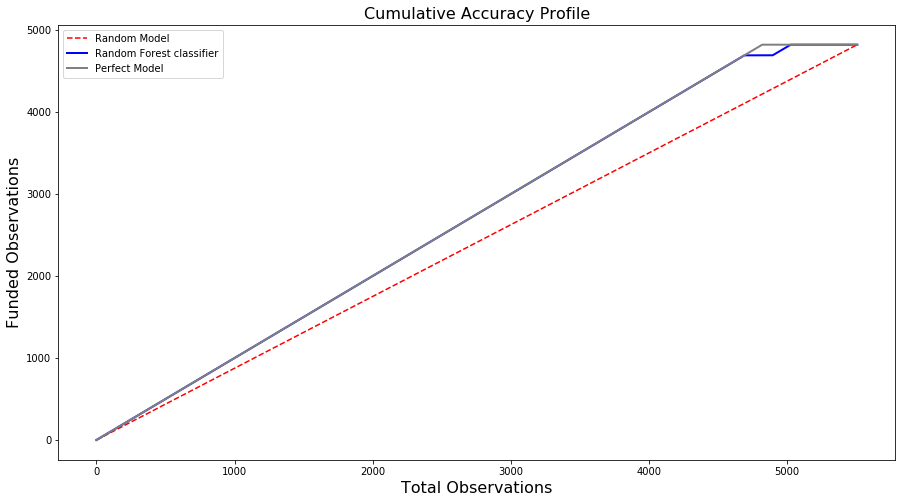

In [13]:
# length of the test data 
total = len(y_test) 
# Counting '1' labels in test data 
one_count = np.sum(y_test) 
# counting '0' lables in test data 
zero_count = total - one_count 

plt.figure(figsize = (15, 8)) 
plt.plot([0, total], [0, one_count], c = 'r', linestyle = '--', label = 'Random Model') 
plt.legend() 

lm = [y for _, y in sorted(zip(y_pred, y_test), reverse = True)] 
p = np.arange(0, total + 1) #p -> X_values
q = np.append([0], np.cumsum(lm)) # 1 -> Y Values
plt.plot(p, q, c = 'b', label = 'Random Forest classifier', linewidth = 2) 
plt.legend() 

plt.plot([0, one_count, total], [0, one_count, one_count], c = 'grey', linewidth = 2, label = 'Perfect Model') 
plt.legend() 
plt.xlabel("Total Observations",fontsize=16)
plt.ylabel("Funded Observations",fontsize=16)
plt.title("Cumulative Accuracy Profile",fontsize=16)

a = auc([0, total], [0, one_count])


aP = auc([0, one_count, total], [0, one_count, one_count]) -a

aR = auc(p, q)-a

print("Accuracy Rate : " ,aR/aP)